<a href="https://colab.research.google.com/github/devanshkmishra/-CodeAlongMLprojects/blob/main/Project_5_Customer_Segmentation_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection and Analysis

In [3]:
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [4]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer_data.shape

(200, 5)

Choosing Annual Income and Spending Score columns only

In [6]:
X = customer_data.iloc[:,[3,4]].values

Choosing the number of clusters:
WCSS -> Within Cluster Sums of Squares

In [11]:
#finding wcss value for different number of clusters (min. wcss)

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

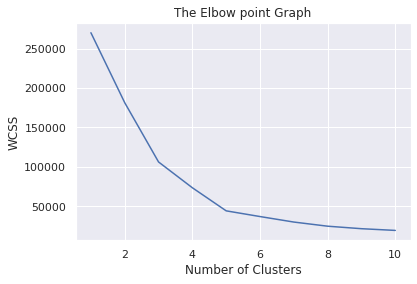

In [12]:
#plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the K-Means Clustering Model:

In [16]:
kmeans = KMeans(n_clusters=5)

#return a label for each data point based on their cluster

Y = kmeans.fit_predict(X)

Visualizing all the Clusters

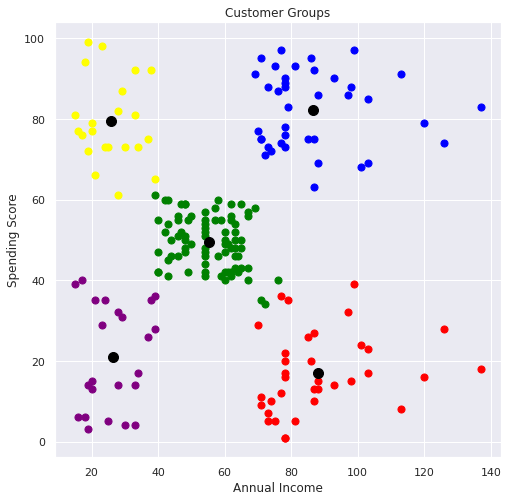

In [20]:
#plotting the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c = 'red', label = 'Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c = 'purple', label = 'Cluster 5')

#plot the centroids

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()